In [1]:
# Various forums and websites I used to get all this working

# https://stackoverflow.com/questions/47796264/how-to-create-a-grouped-bar-plot
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# for a color continuum
# https://stackoverflow.com/questions/21355832/pandas-stacked-bar-chart-duplicates-colors-for-large-legends
# styles reference
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

In [2]:
from random import randint
import pandas as pd
from pandasql import sqldf

In [3]:
locations = ['Norcal', 'Socal', 'Northwest', 'Northeast', 'Midwest', 'Southwest', 'Southeast']
capacities = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70']

In [4]:
location_capacity = []

for i in range(10000):
    rn1 = (randint(0,6) + randint(0,6)) // 2
    rn2 = (randint(0,6) + randint(0,6)  + randint(0,6)) // 3
    #print(rn1, rn2)
    location_capacity.append((locations[rn1], capacities[rn2]))

In [5]:
df = pd.DataFrame(location_capacity)
df.columns=['location','capacity_mw']

In [6]:
df

,location,capacity_mw
0,Northeast,20-30
1,Midwest,20-30
2,Northeast,40-50
3,Northwest,40-50
4,Midwest,20-30
...,...,...
9995,Norcal,40-50
9996,Midwest,30-40
9997,Northeast,20-30
9998,Northeast,40-50


In [7]:
query = """
SELECT capacity_mw, location, count(*) AS number
FROM df
GROUP BY location, capacity_mw
ORDER BY location, capacity_mw
"""

In [8]:
df_orders = sqldf(query, globals())

In [9]:
df_orders

,capacity_mw,location,number
0,0-10,Midwest,40
1,10-20,Midwest,239
2,20-30,Midwest,523
3,30-40,Midwest,547
4,40-50,Midwest,357
5,50-60,Midwest,91
6,60-70,Midwest,6
7,0-10,Norcal,15
8,10-20,Norcal,89
9,20-30,Norcal,194


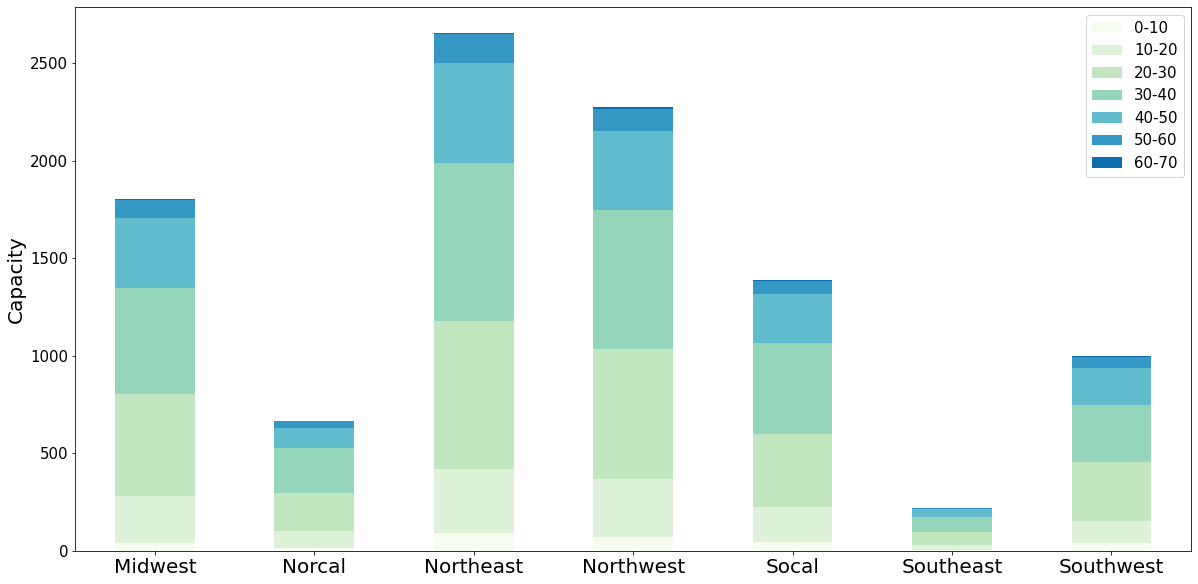

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

df = df_orders
#plt.style.use(None)
colors = plt.cm.GnBu(np.linspace(0, 1, 8))
# to use a pre-built palette
#df.pivot("location", "capacity_mw", "number").plot.bar(stacked=True, colormap='jet', figsize=(10, 6))
df.pivot("location", "capacity_mw", "number").plot(kind='bar', stacked=True, figsize=(20, 10), color=colors)
#df.pivot("location", "capacity_mw", "number").plot(kind='bar', stacked=True, figsize=(20, 10))
plt.legend(prop = {'size' : 15})
plt.xticks(fontsize = 20)
plt.xticks(rotation=0)
plt.yticks(fontsize = 15)
plt.xlabel(None)
plt.ylabel("Capacity", fontsize=20)
plt.show()

In [11]:
# now for a tabular representation
locations = df_orders.groupby(['capacity_mw'])['location'].apply(list)
numbers = df_orders.groupby(['capacity_mw'])['number'].apply(list)
capacities = df_orders.capacity_mw

In [12]:
df_grid = pd.DataFrame(numbers.tolist())
df_grid.columns = locations.tolist()[0]
df_grid.index = capacities.tolist()[0:7]
df_grid.index.name = 'capacty_mw'

In [13]:
df_grid

,Midwest,Norcal,Northeast,Northwest,Socal,Southeast,Southwest
capacty_mw,,,,,,,
0-10,40,15,89,72,45,5,39.0
10-20,239,89,331,296,180,27,116.0
20-30,523,194,757,668,375,62,299.0
30-40,547,230,812,711,465,80,295.0
40-50,357,101,510,402,253,39,190.0
50-60,91,34,149,117,66,5,54.0
60-70,6,4,5,8,3,5,NaN


In [16]:
# to double check thenumbers above
# sqldf("SELECT * FROM df_orders ORDER BY capacity_mw, location", globals())